# Pytorch: CNN Basic

In [1]:
import torch
import torchvision
from tqdm.notebook import tqdm

print(torch.__version__)
print(torchvision.__version__)

2.0.1+cpu
0.15.2+cpu


## 1. Data Loading
- `torchvision`에서 CIFAR10 데이터셋 다운로드

In [2]:
from torchvision.datasets import CIFAR10

train_data = CIFAR10(root="../../data/cifa10/train/",
                    train=True, 
                    download=True)

Files already downloaded and verified


In [3]:
print(train_data.data.shape) # 32x32 컬러 이미지 50000개
print(train_data.targets[:10])
print(train_data.classes)
print(train_data.class_to_idx)

(50000, 32, 32, 3)
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


In [4]:
data, label = train_data[1]

print(type(data))
print(data)

<class 'PIL.Image.Image'>
<PIL.Image.Image image mode=RGB size=32x32 at 0x2BC1DA04C40>


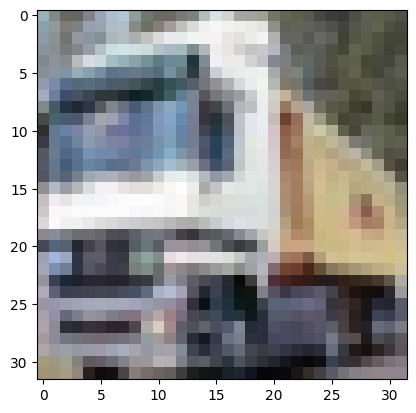

In [5]:
import matplotlib.pyplot as plt
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

plt.imshow(data)

In [6]:
print(type(label))
print(label)
print(train_data.classes[label])

<class 'int'>
9
truck


In [7]:
test_data = CIFAR10(root="../../data/cifa10/test/", 
                    train=False, 
                    download=True)

print(test_data)
print(test_data.data.shape)

Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ../../data/cifa10/test/
    Split: Test
(10000, 32, 32, 3)


## 2. Data Transforms

### 2-1. Trainset Transforms
- Data Augmentation 포함

In [8]:
from torchvision import transforms

train_transforms = transforms.Compose([
          transforms.RandomCrop(32, padding=4),
          transforms.RandomHorizontalFlip(), # augmentation
          transforms.ToTensor(),
          transforms.Normalize(
              (0.4914, 0.4822, 0.4465),
              (0.2023, 0.1994, 0.2010))])

train_data = CIFAR10(root="../../data/cifa10/train/",
                    train=True, 
                    download=True,
                    transform=train_transforms)

Files already downloaded and verified


In [9]:
print(train_data)
print(train_data.transforms)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../../data/cifa10/train/
    Split: Train
    StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )
StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )


In [10]:
data, label = train_data[0]

print(type(data))
print(data.size())
print(data)

<class 'torch.Tensor'>
torch.Size([3, 32, 32])


tensor([[[-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         ...,
         [ 0.1879, -0.0835,  0.0328,  ..., -2.4291, -2.4291, -2.4291],
         [ 0.8858,  0.1297,  0.0910,  ..., -2.4291, -2.4291, -2.4291],
         [ 1.5061,  0.3430,  0.2267,  ..., -2.4291, -2.4291, -2.4291]],

        [[-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         ...,
         [-0.4122, -0.6089, -0.3532,  ..., -2.4183, -2.4183, -2.4183],
         [ 0.1581, -0.6482, -0.5892,  ..., -2.4183, -2.4183, -2.4183],
         [ 0.8661, -0.3139, -0.4319,  ..., -2.4183, -2.4183, -2.4183]],

        [[-2.2214, -2.2214, -2.2214,  ..., -2.2214, -2.2214, -2.2214],
         [-2.2214, -2.2214, -2.2214,  ..., -2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


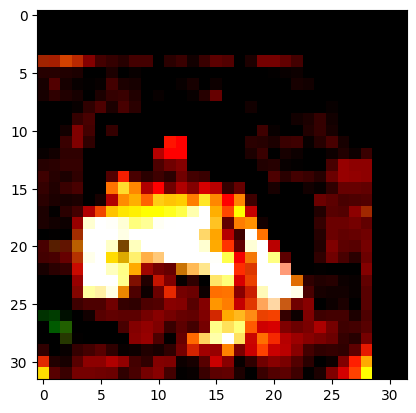

In [11]:
import matplotlib.pyplot as plt

plt.imshow(data.permute(1, 2, 0))

### 2-2. Testset Transforms

In [16]:
test_transforms = transforms.Compose([
          transforms.ToTensor(),
          transforms.Normalize(
              (0.4914, 0.4822, 0.4465),
              (0.2023, 0.1994, 0.2010))])

test_data = torchvision.datasets.CIFAR10(
      root="../../data/cifa10/test/", 
      train=False, 
      transform=test_transforms)

print(test_data)

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ../../data/cifa10/test/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )


## 3. Data Batching with `DataLoader`

In [13]:
trainloader = torch.utils.data.DataLoader(
                    train_data, 
                    batch_size=256, 
                    shuffle=True)

In [14]:
data_batch, labels_batch = next(iter(trainloader))
print(data_batch.size())

print(labels_batch.size())

torch.Size([256, 3, 32, 32])
torch.Size([256])


In [15]:
testloader = torch.utils.data.DataLoader(
                    test_data, 
                    batch_size=256, 
                    shuffle=False)

## 4. Model Design



### 4-1. PyTorch NN Module (torch.nn)

In [17]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleNet(nn.Module):

    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2048, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64,10)

    def forward(self, x):
        x = x.view(-1, 2048)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x),dim=1)
        return x

In [18]:
simplenet = SimpleNet()
print(simplenet)

input = torch.rand(2048)
output = simplenet(input)

SimpleNet(
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


### 4-2: `LeNet5` Style

In [19]:
from torch import nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        # Conv-Base
        self.conv1 = nn.Conv2d(3, 6, 5) # <1>
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # Dense-base
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, int(x.nelement() / x.shape[0]))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = "cuda" if torch.cuda.is_available() else "cpu"
model = LeNet5().to(device=device)

In [20]:
print(model)

LeNet5(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


## 5. Fundamental Training Loop

In [21]:
from torch import optim
from torch import nn

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), # <1>
                      lr=0.001, 
                      momentum=0.9)

In [22]:
N_EPOCHS = 10 
for epoch in tqdm(range(N_EPOCHS)): # <1>

    epoch_loss = 0.0
    for inputs, labels in trainloader:
        inputs = inputs.to(device) # <2>
        labels = labels.to(device)

        optimizer.zero_grad() # <3>

        outputs = model(inputs) # <4>
        loss = criterion(outputs, labels) # <5>
        loss.backward() # <6>
        optimizer.step() # <7>

        epoch_loss += loss.item() # <8>
    print("Epoch: {} Loss: {}".format(epoch, 
                  epoch_loss/len(trainloader)))

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 Loss: 2.3012446298891183
Epoch: 1 Loss: 2.286907906434974
Epoch: 2 Loss: 2.2097117694056765
Epoch: 3 Loss: 2.0462523534589883
Epoch: 4 Loss: 1.9572279082269084
Epoch: 5 Loss: 1.8862166252671455
Epoch: 6 Loss: 1.8276005849546315
Epoch: 7 Loss: 1.7822305140446644
Epoch: 8 Loss: 1.7539863057282505
Epoch: 9 Loss: 1.721463682091966


## 6. Train with Validation set 

### 6-1. Splitting Train/Validation Datasets

In [23]:
from torch.utils.data import random_split

train_set, val_set = random_split(
                      train_data, 
                      [40000, 10000])

trainloader = torch.utils.data.DataLoader(
                    train_set, 
                    batch_size=256, 
                    shuffle=True)

valloader = torch.utils.data.DataLoader(
                    val_set, 
                    batch_size=256, 
                    shuffle=True)

print(len(trainloader))
print(len(valloader))

157
40


### 6-2. Training Loop with Validation

In [24]:
from torch import optim
from torch import nn

model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), 
                      lr=0.001, 
                      momentum=0.9)

In [25]:
N_EPOCHS = 10
for epoch in range(N_EPOCHS):

    # Training 
    train_loss = 0.0
    model.train() # <1>
    for inputs, labels in trainloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Validation
    val_loss = 0.0
    model.eval() # <2>
    for inputs, labels in valloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        val_loss += loss.item()

    print("Epoch: {} Train Loss: {} Val Loss: {}".format(
                  epoch, 
                  train_loss/len(trainloader), 
                  val_loss/len(valloader)))

Epoch: 0 Train Loss: 2.299199338171892 Val Loss: 2.294964075088501
Epoch: 1 Train Loss: 2.2857200704562435 Val Loss: 2.27234748005867
Epoch: 2 Train Loss: 2.2265766851461617 Val Loss: 2.1754958629608154
Epoch: 3 Train Loss: 2.1241949804269584 Val Loss: 2.0835025668144227
Epoch: 4 Train Loss: 2.0308170918446438 Val Loss: 1.995965152978897
Epoch: 5 Train Loss: 1.9669990251018743 Val Loss: 1.9490318208932877
Epoch: 6 Train Loss: 1.9059543009776219 Val Loss: 1.893421620130539
Epoch: 7 Train Loss: 1.844845241801754 Val Loss: 1.832836127281189
Epoch: 8 Train Loss: 1.793665829737475 Val Loss: 1.775667217373848
Epoch: 9 Train Loss: 1.7524384525930805 Val Loss: 1.749532514810562


### 6-3. Metrics with Testset

In [26]:
num_correct = 0.0
for x_test_batch, y_test_batch in testloader:
    model.eval()
    y_test_batch = y_test_batch.to(device)
    x_test_batch = x_test_batch.to(device)
    
    y_pred_batch = model(x_test_batch)
    _, predicted = torch.max(y_pred_batch, 1)
    num_correct += (predicted == y_test_batch).float().sum()

accuracy = num_correct/(len(testloader)*testloader.batch_size) 

print(len(testloader), testloader.batch_size)
print("Test Accuracy: {}".format(accuracy))

40 256
Test Accuracy: 0.3873046934604645


## 8. Model Save & Load

In [27]:
torch.save(model.state_dict(), "../../model/lenet5_model.pt")

In [28]:
model = LeNet5().to(device)
model.load_state_dict(torch.load("../../model/lenet5_model.pt"))

<All keys matched successfully>